# Hybrid Model - Test

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import os
import glob
import sys
import random
import time
import scipy
from keras.optimizers import Adam
import sys
MY_UTILS_PATH = "../Modules/"
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import frequency_spatial_network as fsnet  
import nibabel as nib

/home/roberto/Documents/virtualenv/venv04/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/roberto/Documents/virtualenv/venv04/local/lib/python2.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
under_rate = '20'

stats = np.load("../Data/stats_fs_unet_norm_" + under_rate + ".npy")
var_sampling_mask = np.load("../Data/sampling_mask_" + under_rate + "perc.npy")

model = fsnet.fs_rec_unet_norm_res(stats[0],stats[1],stats[2],stats[3],\
                                   kshape = (5,5),kshape2=(3,3))

opt = Adam()
model.compile(loss = [fsnet.nrmse,fsnet.nrmse],optimizer=opt, loss_weights=[0.01, 0.99])

model_name = "../Models/double_unet_" + under_rate + ".hdf5"
model.load_weights(model_name)

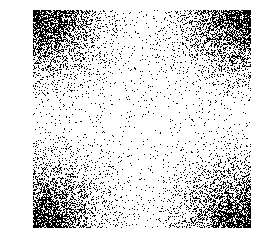

/media/roberto/DATA/GDrive/MR-Data/Normative-Raw-Data/Test/e14736s3_P55296.7.npy
10


In [3]:
fig = plt.figure()
plt.imshow(var_sampling_mask, cmap = "gray")
plt.axis("off")
plt.show()

out_path = "/media/roberto/DATA/GDrive/github/ML101/Hybrid-rec/"
# Test Set 
test_path = "/media/roberto/DATA/GDrive/MR-Data/Normative-Raw-Data/Test/*.npy"
kspace_files = np.asarray(glob.glob(test_path))
print kspace_files[-1]
print len(kspace_files)

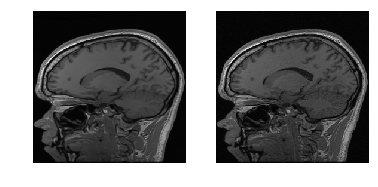

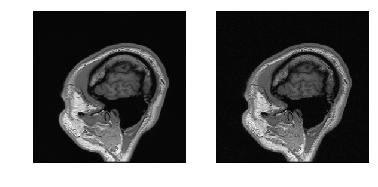

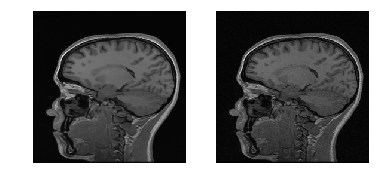

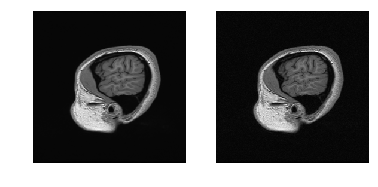

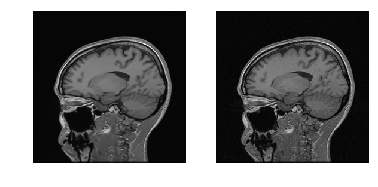

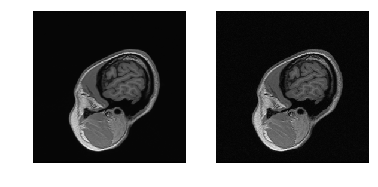

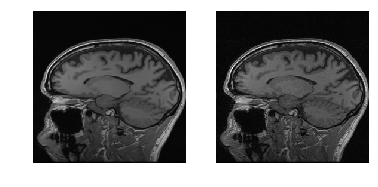

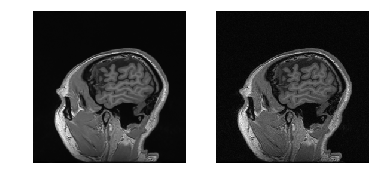

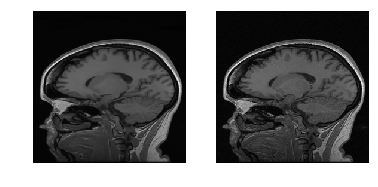

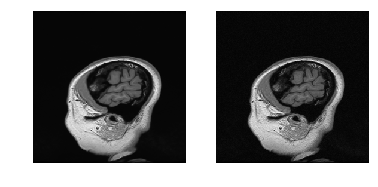

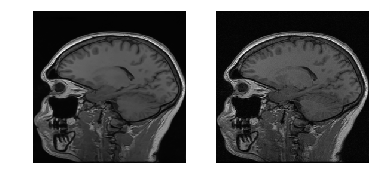

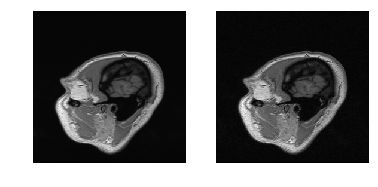

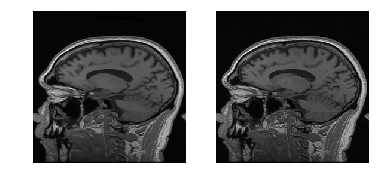

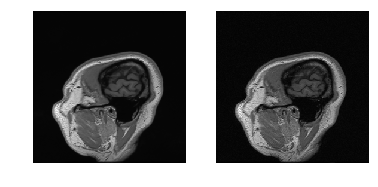

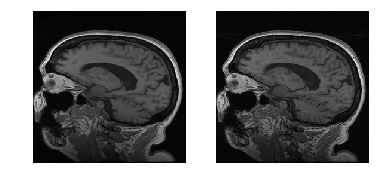

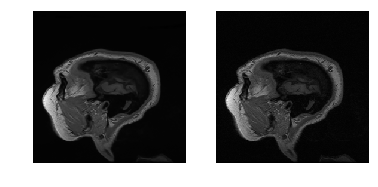

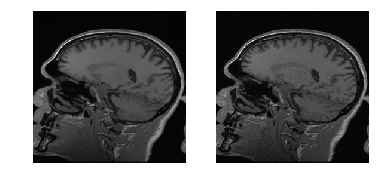

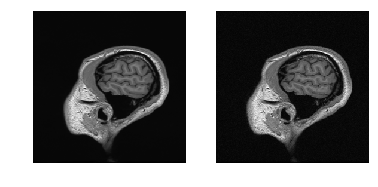

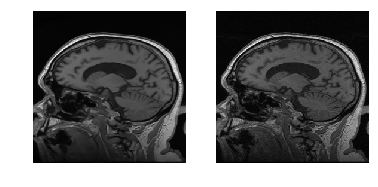

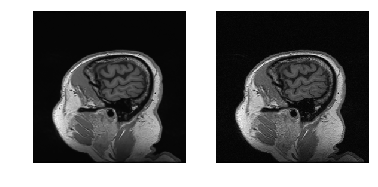

In [4]:
imshape = (256,256)
norm = np.sqrt(imshape[0]*imshape[1])

for jj in xrange(len(kspace_files)):
    kspace = np.load(kspace_files[jj])/norm
    kspace2 = kspace.copy()
    kspace[:,var_sampling_mask,:] = 0
    kspace = (kspace-stats[0])/stats[1]
    rec = np.abs(np.fft.ifft2(kspace2[:,:,:,0]+1j*kspace2[:,:,:,1])).astype(np.float64)
    pred = model.predict(kspace)[1].astype(np.float64)
    name = kspace_files[jj].split("/")[-1].split(".")[0] + "_hybrid.npy"
    np.save(os.path.join(out_path,name),pred[:,:,:,0]*norm)
    
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(pred[100,:,:,0], cmap = "gray")
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(rec[100], cmap = "gray")
    plt.axis("off")
    plt.show()
    
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(pred[25,:,:,0], cmap = "gray")
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(rec[25], cmap = "gray")
    plt.axis("off")
    plt.show()